# Convolution

We will look at:
* numpy
* matplotlib use 
* profiling built-in vs hand-coded
* 1D and 2D convolutions

### Numpy - numerical python
Provides multidimensional arrays and lots of functions on it
http://docs.scipy.org/doc/numpy-1.10.0/reference/

In [3]:
import numpy as np

In [4]:
a = np.array([1,2,3])
b = np.array([3,2,1])

In [5]:
a * 3

array([3, 6, 9])

In [6]:
b - 5

array([-2, -3, -4])

In [7]:
a - b

array([-2,  0,  2])

In [8]:
a * b

array([3, 4, 3])

In [9]:
np.dot(a, b)

10

In [10]:
np.linalg.norm(a) # gets L2 norm = length of vector = sqrt(a[0]**2 + a[1]**2 + a[2]**2)

3.7416573867739413

In [11]:
np.sqrt(a[0]**2 + a[1]**2 + a[2]**2)

3.7416573867739413

### Matplotlib - simple plotting (close to MATLAB compatibility)

In [12]:
import matplotlib.pyplot as plt # plotting functions from this module (need to be prefixed with "plt." )

In [13]:
# ignore the following, just needed for this demo
import matplotlib
%matplotlib inline 
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [14]:
x = np.arange(2*np.pi, step=0.1)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2])

In [15]:
y = np.sin(x)
y

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

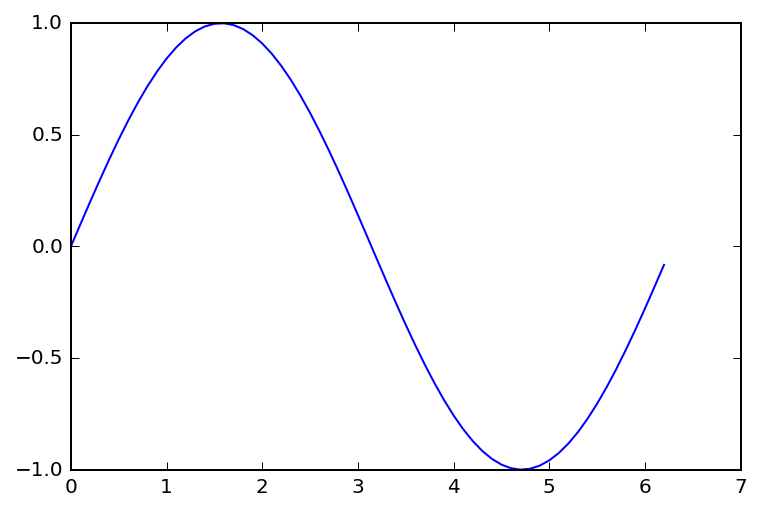

In [16]:
plt.plot(x, y)

### 1D Convolution

$ f * g (t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau $

See [wikipedia](https://en.wikipedia.org/wiki/Convolution) if you need an explanation.


In [17]:
import scipy.ndimage
kernel = np.zeros(51)
kernel[25] = 1
kernel = scipy.ndimage.filters.gaussian_filter1d(kernel, sigma=4.0)

In [18]:
kernel

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.34587404e-05,   8.81520400e-05,   2.18178394e-04,
         5.07279965e-04,   1.10800131e-03,   2.27347108e-03,
         4.38223020e-03,   7.93519376e-03,   1.34982193e-02,
         2.15700930e-02,   3.23805448e-02,   4.56638872e-02,
         6.04948218e-02,   7.52870222e-02,   8.80194464e-02,
         9.66704500e-02,   9.97390995e-02,   9.66704500e-02,
         8.80194464e-02,   7.52870222e-02,   6.04948218e-02,
         4.56638872e-02,   3.23805448e-02,   2.15700930e-02,
         1.34982193e-02,   7.93519376e-03,   4.38223020e-03,
         2.27347108e-03,   1.10800131e-03,   5.07279965e-04,
         2.18178394e-04,   8.81520400e-05,   3.34587404e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

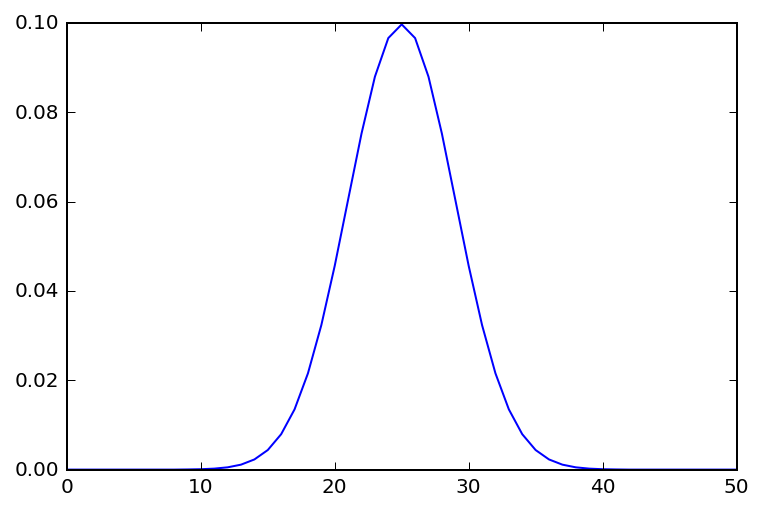

In [19]:
plt.plot(kernel)

In [20]:
signal = np.random.rand(300)

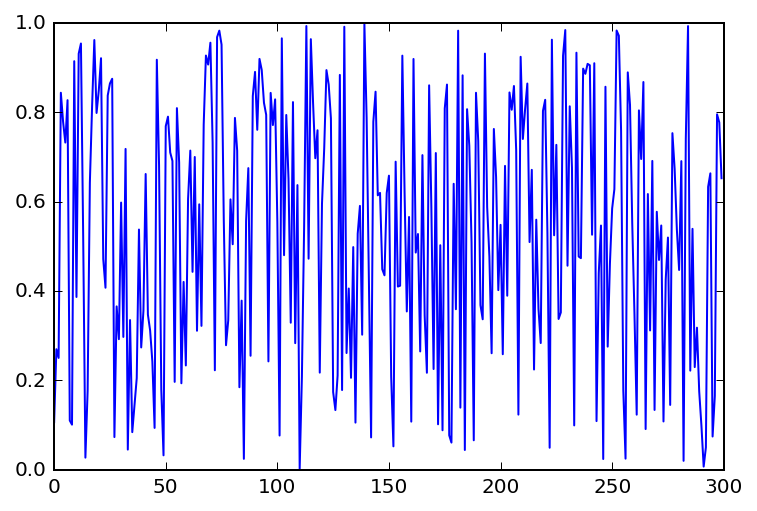

In [21]:
plt.plot(signal)

In [22]:
%timeit convSignal = scipy.ndimage.convolve1d(signal, kernel)

The slowest run took 8.50 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 17.1 µs per loop


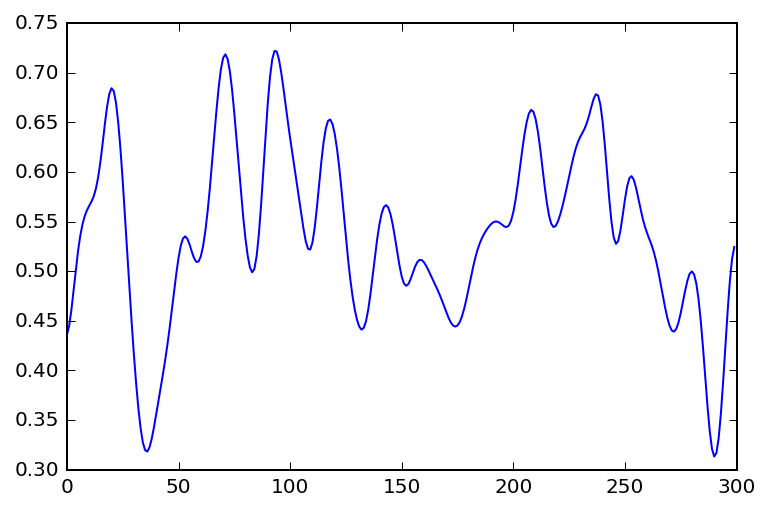

In [25]:
convSignal = scipy.ndimage.convolve1d(signal, kernel)
plt.plot(convSignal)

## let us perform the convolution on our own:

In [29]:
ownConvolution = np.zeros(300)
for i in range(25,275):
    ownConvolution[i] = np.dot(signal[i-25:i+26], kernel)

In [30]:
%%timeit
ownConvolution = np.zeros(300)
for i in range(25,275):
    ownConvolution[i] = np.dot(signal[i-25:i+26], kernel)

1000 loops, best of 3: 308 µs per loop


In [31]:
ownConvolution.shape

(300,)

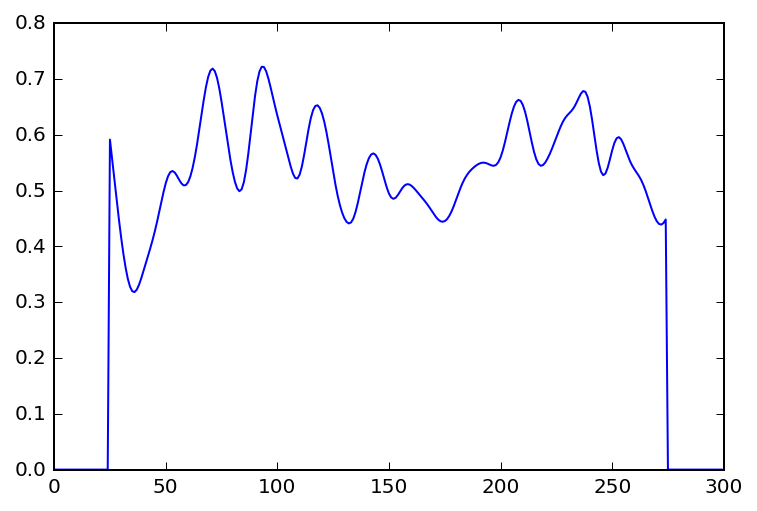

In [32]:
plt.plot(ownConvolution)

## 2D Convolution
Input Signal is an image! Load it as follows:

In [33]:
image = plt.imread('lena.png')

In [34]:
image.shape # has 3 color channels!

(512, 512, 3)

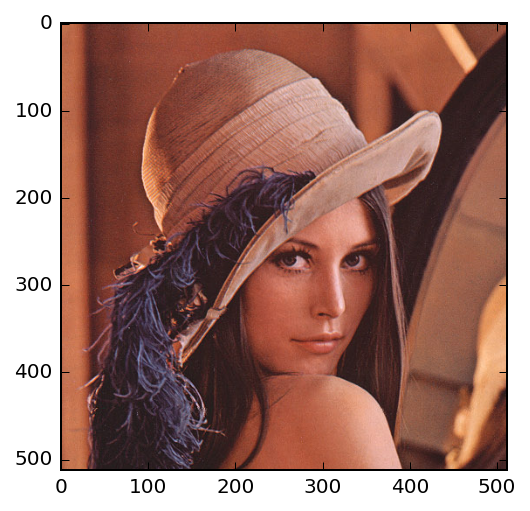

In [35]:
plt.imshow(image)

In [36]:
import skimage.color
imageGray = skimage.color.rgb2gray(image)

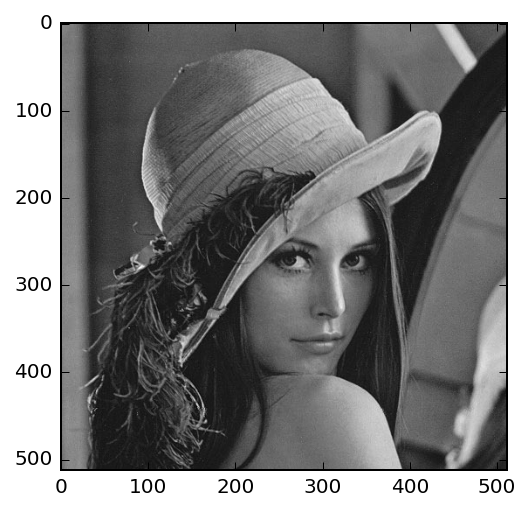

In [95]:
plt.imshow(imageGray, cmap='gray')

In [37]:
kernel = np.zeros((51,51))
kernel[25,25] = 1
kernel = scipy.ndimage.filters.gaussian_filter(kernel, sigma=10.0)

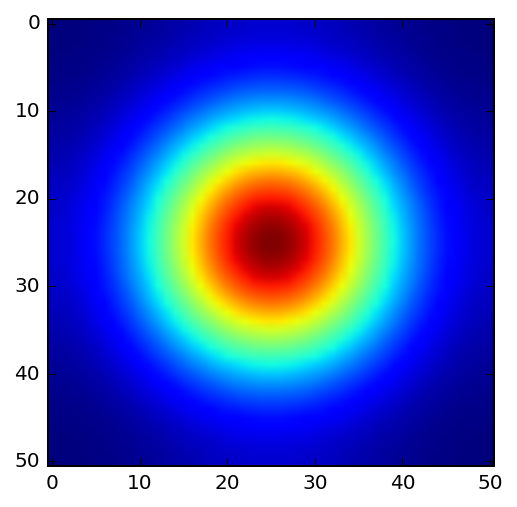

In [38]:
plt.imshow(kernel)

In [39]:
%timeit convImage = scipy.ndimage.convolve(imageGray, kernel)

1 loops, best of 3: 795 ms per loop


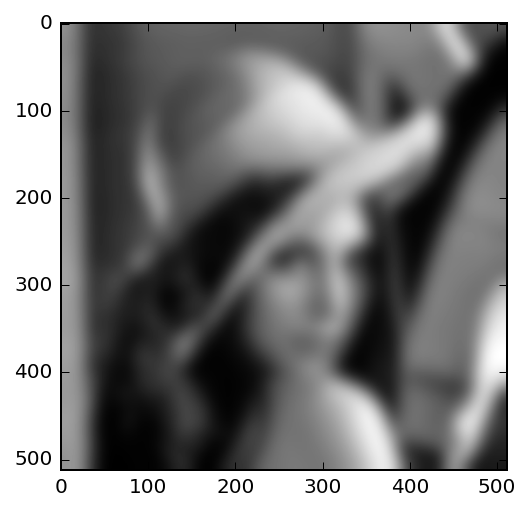

In [40]:
convImage = scipy.ndimage.convolve(imageGray, kernel)
plt.imshow(convImage, cmap='gray')

In [41]:
%%timeit
imageOwnConvolution = np.zeros(imageGray.shape)
for x in range(25,image.shape[0]-25):
    for y in range(25,image.shape[1]-25):
        imageOwnConvolution[x,y] = np.sum(imageGray[x-25:x+26, y-25:y+26] * kernel)

1 loops, best of 3: 2.6 s per loop


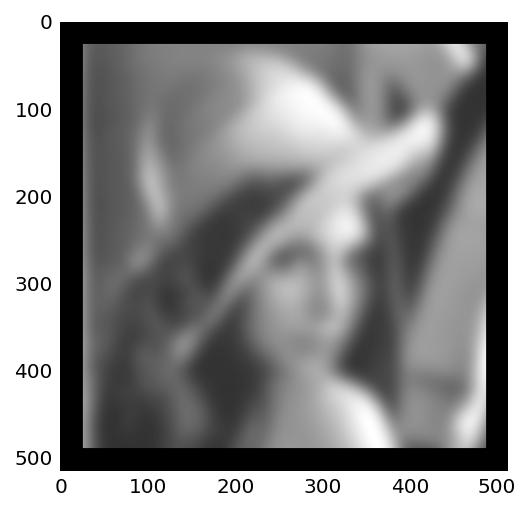

In [42]:
imageOwnConvolution = np.zeros(imageGray.shape)
for x in range(25,image.shape[0]-25):
    for y in range(25,image.shape[1]-25):
        imageOwnConvolution[x,y] = np.sum(imageGray[x-25:x+26, y-25:y+26] * kernel)
plt.imshow(imageOwnConvolution, cmap='gray')